In [1]:
import numpy as np
import pandas as pd

# 10 minutes to pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

## Object creation

Creating a `Series` by passing a list of values, letting ``pandas`` create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame`` by passing a ``NumPy array``, with a ``datetime`` index using ``date_range()`` and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,0.134126,-0.633860,-0.030829,0.876372
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537
2013-01-04,-1.029051,1.355921,0.746115,-0.286618
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753
2013-01-06,-0.938888,1.526846,0.311843,-0.203418


Creating a ``DataFrame`` by passing a ``dictionary`` of objects that can be converted into a series-like structure:

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting ``DataFrame`` have different ``dtypes``:

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using ``IPython``, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

`df2.<TAB>`

In [ ]:
df2.

As you can see, the columns ``A``, ``B``, ``C``, and ``D`` are automatically tab completed. ``E`` and ``F`` are there as well; the rest of the attributes have been truncated for brevity.

## Viewing data

Use ``DataFrame.head()`` and ``DataFrame.tail()`` to view the top and bottom rows of the frame respectively:

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.134126,-0.633860,-0.030829,0.876372
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537
2013-01-04,-1.029051,1.355921,0.746115,-0.286618
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.029051,1.355921,0.746115,-0.286618
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753
2013-01-06,-0.938888,1.526846,0.311843,-0.203418


Display the ``DataFrame.index`` or ``DataFrame.columns``:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> ``DataFrame.to_numpy()`` gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your ``DataFrame`` has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one ``dtype`` for the entire array, while pandas ``DataFrames`` have one ``dtype`` per column. When you call ``DataFrame.to_numpy()``, pandas will find the NumPy ``dtype`` that can hold all of the ``dtypes`` in the ``DataFrame``. This may end up being ``object``, which requires casting every value to a Python object.

For ``df``, our DataFrame of all *floating-point* values, and ``DataFrame.to_numpy()`` is fast and doesn’t require copying data:

In [11]:
df.to_numpy()

array([[ 0.1341261 , -0.63386004, -0.03082912,  0.8763716 ],
       [-0.04954143,  0.92254656, -1.19996656, -1.67027831],
       [-0.24040645,  1.11288826, -1.25067734,  0.74453715],
       [-1.02905078,  1.35592111,  0.7461147 , -0.28661752],
       [-0.22560523, -1.18601499, -1.08357988, -2.2547533 ],
       [-0.93888806,  1.52684643,  0.31184347, -0.20341786]])

In [12]:
df.values

array([[ 0.1341261 , -0.63386004, -0.03082912,  0.8763716 ],
       [-0.04954143,  0.92254656, -1.19996656, -1.67027831],
       [-0.24040645,  1.11288826, -1.25067734,  0.74453715],
       [-1.02905078,  1.35592111,  0.7461147 , -0.28661752],
       [-0.22560523, -1.18601499, -1.08357988, -2.2547533 ],
       [-0.93888806,  1.52684643,  0.31184347, -0.20341786]])

For ``df2``, the DataFrame with multiple ``dtypes``, ``DataFrame.to_numpy()`` is relatively expensive:

In [14]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

``DataFrame.to_numpy()`` does **not** include the *index* or *column labels* in the output.

``describe()`` shows a quick statistic summary of your data:

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.391561,0.516388,-0.417849,-0.465693
std,0.479515,1.137354,0.870121,1.266366
min,-1.029051,-1.186015,-1.250677,-2.254753
25%,-0.764268,-0.244758,-1.170870,-1.324363
50%,-0.233006,1.017717,-0.557205,-0.245018
75%,-0.093557,1.295163,0.226175,0.507548
max,0.134126,1.526846,0.746115,0.876372


Transposing your data:

In [16]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.134126,-0.049541,-0.240406,-1.029051,-0.225605,-0.938888
B,-0.633860,0.922547,1.112888,1.355921,-1.186015,1.526846
C,-0.030829,-1.199967,-1.250677,0.746115,-1.083580,0.311843
D,0.876372,-1.670278,0.744537,-0.286618,-2.254753,-0.203418


``DataFrame.sort_index()`` sorts by an axis:

In [20]:
df.sort_index(axis=1, ascending=False) # try to change axis!

,D,C,B,A
2013-01-01,0.876372,-0.030829,-0.633860,0.134126
2013-01-02,-1.670278,-1.199967,0.922547,-0.049541
2013-01-03,0.744537,-1.250677,1.112888,-0.240406
2013-01-04,-0.286618,0.746115,1.355921,-1.029051
2013-01-05,-2.254753,-1.083580,-1.186015,-0.225605
2013-01-06,-0.203418,0.311843,1.526846,-0.938888


``DataFrame.sort_values()`` sorts by values:

In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753
2013-01-01,0.134126,-0.633860,-0.030829,0.876372
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537
2013-01-04,-1.029051,1.355921,0.746115,-0.286618
2013-01-06,-0.938888,1.526846,0.311843,-0.203418


## Selection

While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, ``DataFrame.at()``, ``DataFrame.iat()``, ``DataFrame.loc()`` and ``DataFrame.iloc()``.

### Getting

Selecting a single column, which yields a ``Series``, equivalent to ``df.A``:

In [22]:
df["A"]

2013-01-01    0.134126
2013-01-02   -0.049541
2013-01-03   -0.240406
2013-01-04   -1.029051
2013-01-05   -0.225605
2013-01-06   -0.938888
Freq: D, Name: A, dtype: float64

In [23]:
df.A

2013-01-01    0.134126
2013-01-02   -0.049541
2013-01-03   -0.240406
2013-01-04   -1.029051
2013-01-05   -0.225605
2013-01-06   -0.938888
Freq: D, Name: A, dtype: float64

Selecting via ``[]`` (``__getitem__``), which slices the rows:

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,0.134126,-0.633860,-0.030829,0.876372
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537
2013-01-04,-1.029051,1.355921,0.746115,-0.286618


### Selection by label

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label) using ``DataFrame.loc()`` or ``DataFrame.at()``.

For getting a cross section using a label:

In [26]:
df.loc[dates[0]]

A    0.134126
B   -0.633860
C   -0.030829
D    0.876372
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.134126,-0.633860
2013-01-02,-0.049541,0.922547
2013-01-03,-0.240406,1.112888
2013-01-04,-1.029051,1.355921
2013-01-05,-0.225605,-1.186015
2013-01-06,-0.938888,1.526846


Showing label slicing, both endpoints are included:

In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.049541,0.922547
2013-01-03,-0.240406,1.112888
2013-01-04,-1.029051,1.355921


Reduction in the dimensions of the returned object:

In [29]:
df.loc["20130102", ["A", "B"]]

A   -0.049541
B    0.922547
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [33]:
df.loc[dates[0], "A"]

13.5 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


For getting fast access to a scalar (equivalent to the prior method):

In [34]:
df.at[dates[0], "A"]

10.6 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
# compare both with %timeit


### Selection by position

See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) using ``DataFrame.iloc()`` or ``DataFrame.at()``.

Select via the position of the passed integers:

In [35]:
df.iloc[3]

A   -1.029051
B    1.355921
C    0.746115
D   -0.286618
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [36]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.029051,1.355921
2013-01-05,-0.225605,-1.186015


By lists of integer position locations, similar to the NumPy/Python style:

In [37]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.049541,-1.199967
2013-01-03,-0.240406,-1.250677
2013-01-05,-0.225605,-1.083580


For slicing rows explicitly:

In [38]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537


For getting a value explicitly:

In [39]:
df.iloc[1, 1]

0.9225465612539278

For getting fast access to a scalar (equivalent to the prior method):

In [40]:
df.iat[1, 1]

0.9225465612539278

### Boolean indexing

Using a single column’s values to select data:

In [41]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.134126,-0.63386,-0.030829,0.876372


Selecting values from a ``DataFrame`` where a boolean condition is met:

In [45]:
df[df > 0]

,A,B,C,D
2013-01-01,0.134126,NaN,NaN,0.876372
2013-01-02,NaN,0.922547,NaN,NaN
2013-01-03,NaN,1.112888,NaN,0.744537
2013-01-04,NaN,1.355921,0.746115,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,1.526846,0.311843,NaN


Using the ``isin()`` method for filtering:

In [46]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,0.134126,-0.633860,-0.030829,0.876372,one
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278,one
2013-01-03,-0.240406,1.112888,-1.250677,0.744537,two
2013-01-04,-1.029051,1.355921,0.746115,-0.286618,three
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753,four
2013-01-06,-0.938888,1.526846,0.311843,-0.203418,three


In [47]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.240406,1.112888,-1.250677,0.744537,two
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [48]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [55]:
df["F"] = s1

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.030829,5,NaN
2013-01-02,-0.049541,0.922547,-1.199967,5,1.0
2013-01-03,-0.240406,1.112888,-1.250677,5,2.0
2013-01-04,-1.029051,1.355921,0.746115,5,3.0
2013-01-05,-0.225605,-1.186015,-1.083580,5,4.0
2013-01-06,-0.938888,1.526846,0.311843,5,5.0


Setting values by label:

In [49]:
df.at[dates[0], "A"] = 0

In [50]:
df

,A,B,C,D
2013-01-01,0.000000,-0.633860,-0.030829,0.876372
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537
2013-01-04,-1.029051,1.355921,0.746115,-0.286618
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753
2013-01-06,-0.938888,1.526846,0.311843,-0.203418


Setting values by position:

In [51]:
df.iat[0, 1] = 0

In [52]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.030829,0.876372
2013-01-02,-0.049541,0.922547,-1.199967,-1.670278
2013-01-03,-0.240406,1.112888,-1.250677,0.744537
2013-01-04,-1.029051,1.355921,0.746115,-0.286618
2013-01-05,-0.225605,-1.186015,-1.083580,-2.254753
2013-01-06,-0.938888,1.526846,0.311843,-0.203418


Setting by assigning with a NumPy array:

In [53]:
df.loc[:, "D"] = np.array([5] * len(df))

<ipython-input-53-c9cfd4f62edf>:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


In [54]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.030829,5
2013-01-02,-0.049541,0.922547,-1.199967,5
2013-01-03,-0.240406,1.112888,-1.250677,5
2013-01-04,-1.029051,1.355921,0.746115,5
2013-01-05,-0.225605,-1.186015,-1.083580,5
2013-01-06,-0.938888,1.526846,0.311843,5


A ``where`` operation with setting:

In [56]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.030829,-5,NaN
2013-01-02,-0.049541,-0.922547,-1.199967,-5,-1.0
2013-01-03,-0.240406,-1.112888,-1.250677,-5,-2.0
2013-01-04,-1.029051,-1.355921,-0.746115,-5,-3.0
2013-01-05,-0.225605,-1.186015,-1.083580,-5,-4.0
2013-01-06,-0.938888,-1.526846,-0.311843,-5,-5.0


## Missing data

pandas primarily uses the value ``np.nan`` to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [58]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.030829,5,NaN,1.0
2013-01-02,-0.049541,0.922547,-1.199967,5,1.0,1.0
2013-01-03,-0.240406,1.112888,-1.250677,5,2.0,NaN
2013-01-04,-1.029051,1.355921,0.746115,5,3.0,NaN


``DataFrame.dropna()`` drops any rows that have missing data:

In [59]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.049541,0.922547,-1.199967,5,1.0,1.0


``DataFrame.fillna()`` fills missing data:

In [60]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.030829,5,5.0,1.0
2013-01-02,-0.049541,0.922547,-1.199967,5,1.0,1.0
2013-01-03,-0.240406,1.112888,-1.250677,5,2.0,5.0
2013-01-04,-1.029051,1.355921,0.746115,5,3.0,5.0


``isna()`` gets the boolean mask where values are ``nan``:

In [61]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-binop).

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [62]:
df.mean()

A   -0.413915
B    0.622031
C   -0.417849
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [63]:
df.mean(axis=1)

2013-01-01    1.242293
2013-01-02    1.134608
2013-01-03    1.324361
2013-01-04    1.814597
2013-01-05    1.300960
2013-01-06    2.179960
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension:

In [64]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.030829,5,NaN
2013-01-02,-0.049541,0.922547,-1.199967,5,1.0
2013-01-03,-0.240406,1.112888,-1.250677,5,2.0
2013-01-04,-1.029051,1.355921,0.746115,5,3.0
2013-01-05,-0.225605,-1.186015,-1.083580,5,4.0
2013-01-06,-0.938888,1.526846,0.311843,5,5.0


In [69]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.240406,0.112888,-2.250677,4.0,1.0
2013-01-04,-4.029051,-1.644079,-2.253885,2.0,0.0
2013-01-05,-5.225605,-6.186015,-6.083580,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

``DataFrame.apply()``  applies a user defined function to the data:

In [70]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.030829,5,NaN
2013-01-02,-0.049541,0.922547,-1.230796,10,1.0
2013-01-03,-0.289948,2.035435,-2.481473,15,3.0
2013-01-04,-1.318999,3.391356,-1.735358,20,6.0
2013-01-05,-1.544604,2.205341,-2.818938,25,10.0
2013-01-06,-2.483492,3.732187,-2.507095,30,15.0


In [71]:
df.apply(lambda x: x.max() - x.min())

A    1.029051
B    2.712861
C    1.996792
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-discretization).

In [72]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    6
1    6
2    4
3    0
4    5
5    6
6    4
7    0
8    6
9    3
dtype: int32

In [73]:
s.value_counts()

6    4
4    2
0    2
5    1
3    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the ``str`` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in ``str`` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods).

In [74]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together ``Series`` and ``DataFrame`` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with ``concat()``:

In [83]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.788111,1.470325,0.023797,-0.112537
1,-0.077881,0.349738,-0.383507,-2.211722
2,-0.986443,0.467014,-0.562789,0.848555
3,-0.190941,-0.918407,-0.061999,-0.455326
4,0.348726,-1.257938,-0.367634,0.118601
5,-1.313393,-0.361038,-0.082024,-1.348819
6,2.886138,0.734207,-1.094698,-0.924704
7,0.169489,0.241906,-0.777246,0.969228
8,0.503647,-1.545760,-0.054511,2.509199
9,0.128251,-0.171724,0.580616,0.126177


In [84]:
pieces = [df[:3], df[3:7], df[7:]]

In [85]:
from IPython.display import display

for df in pieces:
    display(df)

,0,1,2,3
0,-0.788111,1.470325,0.023797,-0.112537
1,-0.077881,0.349738,-0.383507,-2.211722
2,-0.986443,0.467014,-0.562789,0.848555


,0,1,2,3
3,-0.190941,-0.918407,-0.061999,-0.455326
4,0.348726,-1.257938,-0.367634,0.118601
5,-1.313393,-0.361038,-0.082024,-1.348819
6,2.886138,0.734207,-1.094698,-0.924704


,0,1,2,3
7,0.169489,0.241906,-0.777246,0.969228
8,0.503647,-1.545760,-0.054511,2.509199
9,0.128251,-0.171724,0.580616,0.126177


In [86]:
pd.concat(pieces)

,0,1,2,3
0,-0.788111,1.470325,0.023797,-0.112537
1,-0.077881,0.349738,-0.383507,-2.211722
2,-0.986443,0.467014,-0.562789,0.848555
3,-0.190941,-0.918407,-0.061999,-0.455326
4,0.348726,-1.257938,-0.367634,0.118601
5,-1.313393,-0.361038,-0.082024,-1.348819
6,2.886138,0.734207,-1.094698,-0.924704
7,0.169489,0.241906,-0.777246,0.969228
8,0.503647,-1.545760,-0.054511,2.509199
9,0.128251,-0.171724,0.580616,0.126177


> Adding a column to a ``DataFrame`` is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a ``DataFrame`` by iteratively appending records to it.

### Join

``merge()`` enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join) section.

left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [88]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [89]:
left

,key,lval
0,foo,1
1,foo,2


In [90]:
right

,key,rval
0,foo,4
1,foo,5


In [91]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [93]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [94]:
left

,key,lval
0,foo,1
1,bar,2


In [95]:
right

,key,rval
0,foo,4
1,bar,5


In [96]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby).

In [97]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)


In [98]:
df

,A,B,C,D
0,foo,one,0.205905,-0.962327
1,bar,one,0.763693,-0.417075
2,foo,two,-1.014653,-0.306494
3,bar,three,-0.560707,-0.145617
4,foo,two,2.556130,0.500588
5,bar,two,-1.354708,0.340450
6,foo,one,0.470644,1.530291
7,foo,three,-0.160767,-0.946866


Grouping and then applying the ``sum()`` function to the resulting groups:

In [99]:
df.groupby("A").sum()

<ipython-input-99-c4c1e26c5f1f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("A").sum()


,C,D
A,,
bar,-1.151722,-0.222242
foo,2.057259,-0.184809


In [100]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.151722,-0.222242
foo,2.057259,-0.184809


Grouping by multiple columns forms a hierarchical index, and again we can apply the ``sum()`` function:

In [101]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.763693 -0.417075
    three -0.560707 -0.145617
    two   -1.354708  0.340450
foo one    0.676549  0.567963
    three -0.160767 -0.946866
    two    1.541476  0.194094

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [104]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [105]:
df

A         B
first second                    
bar   one    -0.881553  1.404914
      two     0.100855 -0.447051
baz   one    -0.307631  1.230099
      two     0.542628  0.845413
foo   one     0.629649  0.450096
      two    -0.152435  0.031025
qux   one     0.076102 -0.480332
      two     0.011226 -0.888396

In [107]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.881553  1.404914
      two     0.100855 -0.447051
baz   one    -0.307631  1.230099
      two     0.542628  0.845413

The ``stack()`` method “compresses” a level in the ``DataFrame``’s columns:

In [110]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -0.881553
               B    1.404914
       two     A    0.100855
               B   -0.447051
baz    one     A   -0.307631
               B    1.230099
       two     A    0.542628
               B    0.845413
dtype: float64

With a “stacked” ``DataFrame`` or ``Series`` (having a ``MultiIndex`` as the index), the inverse operation of ``stack()`` is ``unstack()``, which by default unstacks the last level:

In [111]:
stacked.unstack()

A         B
first second                    
bar   one    -0.881553  1.404914
      two     0.100855 -0.447051
baz   one    -0.307631  1.230099
      two     0.542628  0.845413

In [113]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.881553  0.100855
      B  1.404914 -0.447051
baz   A -0.307631  0.542628
      B  1.230099  0.845413

In [114]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.881553 -0.307631
       B  1.404914  1.230099
two    A  0.100855  0.542628
       B -0.447051  0.845413

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot).

In [116]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,-0.680334,1.384292
1,one,B,foo,-0.958536,1.486542
2,two,C,foo,0.030420,0.203234
3,three,A,bar,-0.075625,1.115595
4,one,B,bar,-0.577041,-1.174050
5,one,C,bar,0.201911,0.934411
6,two,A,foo,-1.511597,0.693379
7,three,B,foo,-0.678738,1.234233
8,one,C,foo,0.192049,1.086269
9,one,A,bar,0.533331,1.020570


``pivot_table()`` pivots a ``DataFrame`` specifying the values, index and columns

In [119]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.533331 -0.680334
      B -0.577041 -0.958536
      C  0.201911  0.192049
three A -0.075625       NaN
      B       NaN -0.678738
      C -1.064102       NaN
two   A       NaN -1.511597
      B -0.885875       NaN
      C       NaN  0.030420

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries).

In [120]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts

2012-01-01 00:00:00    401
2012-01-01 00:00:01    320
2012-01-01 00:00:02    238
2012-01-01 00:00:03    451
2012-01-01 00:00:04    286
                      ... 
2012-01-01 00:01:35    220
2012-01-01 00:01:36    293
2012-01-01 00:01:37    273
2012-01-01 00:01:38    100
2012-01-01 00:01:39    393
Freq: S, Length: 100, dtype: int32

In [122]:
ts.resample("5Min").sum()

2012-01-01    23742
Freq: 5T, dtype: int32

``Series.tz_localize()`` localizes a time series to a time zone:

In [123]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.097527
2012-03-07    0.427731
2012-03-08   -1.317702
2012-03-09   -0.355131
2012-03-10   -2.255211
Freq: D, dtype: float64

In [125]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00    0.097527
2012-03-07 00:00:00+00:00    0.427731
2012-03-08 00:00:00+00:00   -1.317702
2012-03-09 00:00:00+00:00   -0.355131
2012-03-10 00:00:00+00:00   -2.255211
Freq: D, dtype: float64

``Series.tz_convert()`` converts a timezones aware time series to another time zone:

In [126]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.097527
2012-03-06 19:00:00-05:00    0.427731
2012-03-07 19:00:00-05:00   -1.317702
2012-03-08 19:00:00-05:00   -0.355131
2012-03-09 19:00:00-05:00   -2.255211
Freq: D, dtype: float64

Converting between time span representations:

In [127]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.585080
2012-02-29   -0.313631
2012-03-31    1.000849
2012-04-30    0.150144
2012-05-31   -0.365923
Freq: M, dtype: float64

In [128]:
ps = ts.to_period()

ps

2012-01   -0.585080
2012-02   -0.313631
2012-03    1.000849
2012-04    0.150144
2012-05   -0.365923
Freq: M, dtype: float64

In [129]:
ps.to_timestamp()

2012-01-01   -0.585080
2012-02-01   -0.313631
2012-03-01    1.000849
2012-04-01    0.150144
2012-05-01   -0.365923
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [131]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

ts = pd.Series(np.random.randn(len(prng)), prng)

ts

1990Q1    2.737840
1990Q2    0.220220
1990Q3    0.986490
1990Q4   -0.439412
1991Q1   -0.188179
1991Q2   -0.212852
1991Q3   -0.371617
1991Q4   -0.485020
1992Q1   -2.210395
1992Q2    0.778897
1992Q3    0.925894
1992Q4   -1.255766
1993Q1    0.299480
1993Q2   -0.164071
1993Q3   -1.985448
1993Q4    1.327153
1994Q1   -0.281125
1994Q2    0.468658
1994Q3    0.814699
1994Q4   -0.006858
1995Q1    0.107625
1995Q2   -0.549068
1995Q3    0.171675
1995Q4   -0.413559
1996Q1    1.151237
1996Q2    0.749900
1996Q3   -0.022939
1996Q4   -1.110078
1997Q1    1.354696
1997Q2   -0.361498
1997Q3    1.072228
1997Q4   -1.075430
1998Q1   -1.087771
1998Q2   -0.217122
1998Q3    0.794013
1998Q4    0.349812
1999Q1   -0.678878
1999Q2    1.092795
1999Q3    0.938534
1999Q4    0.200277
2000Q1   -1.200318
2000Q2    0.473891
2000Q3   -0.089967
2000Q4    0.833850
Freq: Q-NOV, dtype: float64

In [132]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00    2.737840
1990-06-01 09:00    0.220220
1990-09-01 09:00    0.986490
1990-12-01 09:00   -0.439412
1991-03-01 09:00   -0.188179
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a ``DataFrame``. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

In [134]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

df


,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [135]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [136]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under ``Series.cat()`` return a new ``Series`` by default):

In [137]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)


df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [138]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [139]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

In [140]:
import matplotlib.pyplot as plt

plt.close("all")

The ``plt.close method`` is used to close a figure window:

<AxesSubplot:>

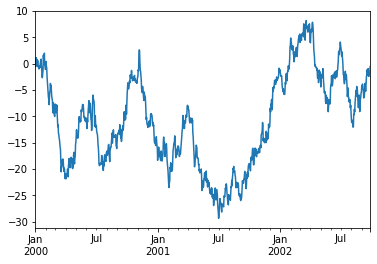

In [142]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

If running under Jupyter Notebook, the plot will appear on ``plot()``. Otherwise use ``matplotlib.pyplot.show`` to show it or ``matplotlib.pyplot.savefig`` to write it to a file.

On a ``DataFrame``, the ``plot()`` method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

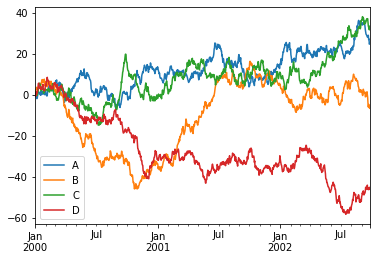

In [143]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc="best")

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv): using ``DataFrame.to_csv()``

In [144]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table): using ``read_csv()``

In [145]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.102341,0.588762,0.360549,-0.665880
1,2000-01-02,0.159297,0.572938,-0.136840,0.094826
2,2000-01-03,-0.538602,2.836975,0.448194,-0.551708
3,2000-01-04,-0.698736,2.969261,1.478340,0.585398
4,2000-01-05,-1.679191,3.669609,1.208433,1.512728
...,...,...,...,...,...
995,2002-09-22,27.001476,-4.696020,32.976113,-45.249688
996,2002-09-23,27.229845,-4.703474,32.397842,-45.170396
997,2002-09-24,24.719112,-6.247370,31.698388,-46.087265
998,2002-09-25,24.968969,-6.582314,33.544620,-45.781625


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel).

In [146]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


Writing to an excel file using ``DataFrame.to_excel()``:

In [147]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using ``read_excel()``:

In [148]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.102341,0.588762,0.360549,-0.665880
1,2000-01-02,0.159297,0.572938,-0.136840,0.094826
2,2000-01-03,-0.538602,2.836975,0.448194,-0.551708
3,2000-01-04,-0.698736,2.969261,1.478340,0.585398
4,2000-01-05,-1.679191,3.669609,1.208433,1.512728
...,...,...,...,...,...
995,2002-09-22,27.001476,-4.696020,32.976113,-45.249688
996,2002-09-23,27.229845,-4.703474,32.397842,-45.170396
997,2002-09-24,24.719112,-6.247370,31.698388,-46.087265
998,2002-09-25,24.968969,-6.582314,33.544620,-45.781625


## Gotchas

If you are attempting to perform a boolean operation on a ``Series`` or ``DataFrame`` you might see an exception like:

In [149]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Should it be ``True`` because it’s not zero-length, or ``False`` because there are ``False`` values? It is unclear, so instead, pandas raises a ``ValueError``.

See [Comparisons](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas) for an explanation and what to do.

### Boolean reductions

You can apply the reductions: ``empty``, ``any()``, ``all()``, and ``bool()`` to provide a way to summarize a boolean result.

In [150]:
(df > 0).all()

A    False
B    False
C    False
D    False
dtype: bool

In [151]:
(df > 0).any()

A    True
B    True
C    True
D    True
dtype: bool

You can reduce to a final boolean value.

In [152]:
(df > 0).any().any()

True

You can test if a pandas object is empty, via the ``empty`` property.

In [153]:
df.empty

False

In [154]:
pd.DataFrame(columns=list("ABC")).empty

True

To evaluate single-element pandas objects in a boolean context, use the method ``bool()``:

In [155]:
pd.Series([True]).bool()

True

In [156]:
pd.Series([False]).bool()

False

In [157]:
pd.DataFrame([[True]]).bool()

True

In [158]:
pd.DataFrame([[False]]).bool()

False